<BarContainer object of 4 artists>

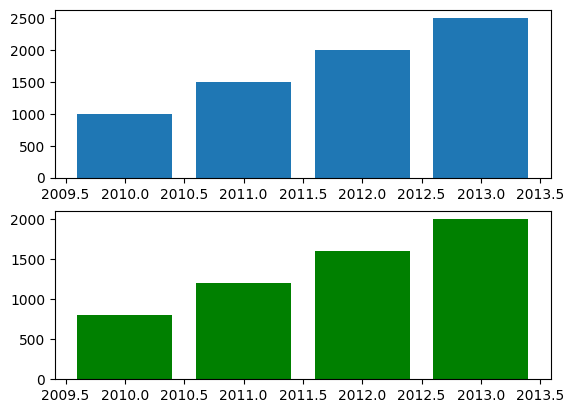

In [1]:
import matplotlib.pyplot as plt

year = [ 2010, 2011, 2012, 2013]
income = [ 1000, 1500, 2000, 2500]
expenses = [ 800, 1200, 1600, 2000]

plt.subplot(2,1,1)
plt.bar(year, income)

plt.subplot(2,1,2)
plt.bar(year, expenses,color='green')

In [2]:
import pandas as pd

In [3]:
Nepal = {
    "city": ["Kathmandu","Pokhara","Biratnagar"],
    "Temp": [27,30,45],
    "Humidity": [10,15,11]
}

USA ={
    "city": ["LA","Ohio","Texas"],
    "Temp": [25,30,27],
    "Humidity": [10,5,17]
}

In [4]:
df1= pd.DataFrame.from_dict(Nepal)
df1

,city,Temp,Humidity
0,Kathmandu,27,10
1,Pokhara,30,15
2,Biratnagar,45,11


In [5]:
df2= pd.DataFrame.from_dict(USA)
df2

,city,Temp,Humidity
0,LA,25,10
1,Ohio,30,5
2,Texas,27,17


In [6]:
df1.describe()

,Temp,Humidity
count,3.000000,3.000000
mean,34.000000,12.000000
std,9.643651,2.645751
min,27.000000,10.000000
25%,28.500000,10.500000
50%,30.000000,11.000000
75%,37.500000,13.000000
max,45.000000,15.000000


In [7]:
df1.describe(include='O') # type: ignore #type : ignore

,city
count,3
unique,3
top,Kathmandu
freq,1


In [8]:
df1[df1["Temp"]>30] [["city","Temp"]]

,city,Temp
2,Biratnagar,45


In [9]:
%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='city', ylabel='Temp'>

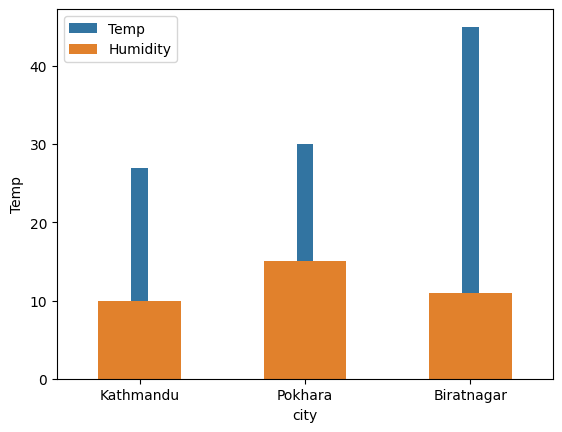

In [10]:
sns.barplot(x=df1["city"],y=df1["Temp"],width= .1, label="Temp")
sns.barplot(x=df1["city"],y=df1["Humidity"],width= .5, label="Humidity")

In [11]:
df1["Temp"].mean()

np.float64(34.0)

In [12]:
df1["Temp"].min()

np.int64(27)

<Axes: xlabel='city', ylabel='Temp'>

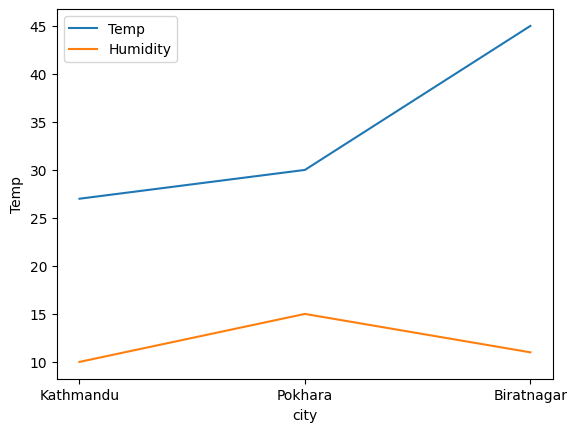

In [13]:
sns.lineplot(x=df1["city"],y=df1["Temp"], label="Temp")
sns.lineplot(x=df1["city"],y=df1["Humidity"], label="Humidity")

# Handeling Missing Datas


In [14]:
import pandas as pd
import numpy as np
df1= pd.read_csv("weather_data.csv")
df1

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [15]:
df2 = pd.read_csv("weather_data_m.csv")
df2

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [16]:
df1.isnull().sum ()

day            0
temperature    0
windspeed      0
event          0
dtype: int64

In [17]:
df2.isnull().sum ()

day            0
temperature    4
windspeed      4
event          2
dtype: int64

In [18]:
df1 = df1.replace(to_replace=[-99999,-88888], value=0)
df1

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,0,7,Sunny
2,1/3/2017,28,0,Snow
3,1/4/2017,0,7,0
4,1/5/2017,32,0,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [19]:
df1["temperature"] = df1["temperature"].replace(0, value=df1["temperature"].median())
df1["windspeed"] = df1["windspeed"].replace(0, value=df1["windspeed"].median())
df1["event"] = df1["event"].replace('0', value="Sunny")
df1

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,31,7,Sunny
2,1/3/2017,28,5,Snow
3,1/4/2017,31,7,Sunny
4,1/5/2017,32,5,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,Sunny


In [20]:
df2["temperature"]= df2["temperature"].fillna(df2["temperature"].median())
df2["windspeed"]= df2["windspeed"].fillna(df2["windspeed"].median())
df2["event"]= df2["event"].fillna("Sunny") 
df2

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,32.0,9.0,Sunny
2,1/5/2017,28.0,8.0,Snow
3,1/6/2017,32.0,7.0,Sunny
4,1/7/2017,32.0,8.0,Rain
5,1/8/2017,32.0,8.0,Sunny
6,1/9/2017,32.0,8.0,Sunny
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [21]:
import pandas as pd 
df = pd.read_csv("weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [22]:
g = df.groupby("city")
g

In [23]:
for city, data in g:
    print("\n")
    print("city:", city)
    print("data: \n", data) 



city: mumbai
data: 
         day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain


city: new york
data: 
         day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny


city: paris
data: 
          day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [24]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [25]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [26]:
g.describe(include='O') #type: ignore

day                       event                    
         count unique       top freq count unique     top freq
city                                                          
mumbai       4      4  1/1/2017    1     4      3     Fog    2
new york     4      4  1/1/2017    1     4      3   Sunny    2
paris        4      4  1/1/2017    1     4      2  Cloudy    3

In [27]:
g.mean(["temperature"]) #type: ignore

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [28]:
g.median('temperature') #type: ignore

,temperature,windspeed
city,,
mumbai,88.5,8.5
new york,32.5,7.0
paris,47.5,11.5


In [29]:
g.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


# Pandas Concatention

In [30]:
import pandas as pd

india_weather = pd.DataFrame({
    "city": ["Delhi", "Mumbai", "Kolkata"],
    "temperature": [30, 32, 28], 
    "humidity": [70, 65, 75]
})

india_weather

,city,temperature,humidity
0,Delhi,30,70
1,Mumbai,32,65
2,Kolkata,28,75


In [31]:
us_weather = pd.DataFrame({
    "city": ["New York", "Los Angeles", "Chicago"],
    "temperature": [25, 30, 28],
    "humidity": [60, 55, 65]
})
us_weather

,city,temperature,humidity
0,New York,25,60
1,Los Angeles,30,55
2,Chicago,28,65


In [32]:
df = pd.concat([india_weather, us_weather] , ignore_index=True)
df

,city,temperature,humidity
0,Delhi,30,70
1,Mumbai,32,65
2,Kolkata,28,75
3,New York,25,60
4,Los Angeles,30,55
5,Chicago,28,65


# Concatenation and Keys

In [33]:
df = pd.concat([india_weather, us_weather], keys=["India", "USA"])
df

city  temperature  humidity
India 0        Delhi           30        70
      1       Mumbai           32        65
      2      Kolkata           28        75
USA   0     New York           25        60
      1  Los Angeles           30        55
      2      Chicago           28        65

In [34]:
df.loc["USA"]

,city,temperature,humidity
0,New York,25,60
1,Los Angeles,30,55
2,Chicago,28,65


# Concatenation using index

In [35]:
temperature_df = pd.DataFrame({
    "city": ["Delhi", "Mumbai", "Kolkata", "New York", "Los Angeles", "Chicago"],
    "temperature": [30, 32, 28, 25, 30, 28]
})
temperature_df

,city,temperature
0,Delhi,30
1,Mumbai,32
2,Kolkata,28
3,New York,25
4,Los Angeles,30
5,Chicago,28


In [36]:
windspeed_df = pd.DataFrame({
    "city": [ "Kolkata", "Mumbai", "Delhi",  "New York"],
    "windspeed": [10, 12, 8, 15]
})
windspeed_df

,city,windspeed
0,Kolkata,10
1,Mumbai,12
2,Delhi,8
3,New York,15


In [37]:
df = pd.concat([temperature_df, windspeed_df], axis=1)  #axis=1 means columns, axis=0 means rows
df

,city,temperature,city,windspeed
0,Delhi,30,Kolkata,10.0
1,Mumbai,32,Mumbai,12.0
2,Kolkata,28,Delhi,8.0
3,New York,25,New York,15.0
4,Los Angeles,30,NaN,NaN
5,Chicago,28,NaN,NaN


# Concatenate dataframe with series

In [38]:
s = pd.Series(["humid", "dry", "sunny", "rain","humid","dry"], name="event")
s

0    humid
1      dry
2    sunny
3     rain
4    humid
5      dry
Name: event, dtype: object

In [39]:
df = pd.concat([temperature_df,s], axis=1)  #axis=1 means columns, axis=0 means rows
df

,city,temperature,event
0,Delhi,30,humid
1,Mumbai,32,dry
2,Kolkata,28,sunny
3,New York,25,rain
4,Los Angeles,30,humid
5,Chicago,28,dry


# Basic merge using dataframe column


In [40]:
import pandas as pd
df1 = pd.DataFrame({
    "city": ["New York", "Los Angeles", "Chicago"],
    "temperature": [30, 32, 28],
})
df1

,city,temperature
0,New York,30
1,Los Angeles,32
2,Chicago,28


In [41]:
df2 = pd.DataFrame({
    "city": ["New York", "Los Angeles", "Chicago"],
    "humidity": [25, 30, 28],
})
df2

,city,humidity
0,New York,25
1,Los Angeles,30
2,Chicago,28


In [42]:
df3 = pd.merge(df1, df2, on="city")
df3  

,city,temperature,humidity
0,New York,30,25
1,Los Angeles,32,30
2,Chicago,28,28


# Types of database joins

In [43]:
df1 = pd.DataFrame({
    "city": ["New York", "Los Angeles", "Chicago","ornaldo"],
    "temperature": [30, 32, 28,35],
})
df1

,city,temperature
0,New York,30
1,Los Angeles,32
2,Chicago,28
3,ornaldo,35


In [44]:
df2 = pd.DataFrame({
    "city":["New York", "Los Angeles", "san dieago"],
    "humidity": [25, 30, 28],
})  
df2

,city,humidity
0,New York,25
1,Los Angeles,30
2,san dieago,28


In [45]:
df3 = pd.merge(df1, df2, on="city", how="inner")  # inner join
df3

,city,temperature,humidity
0,New York,30,25
1,Los Angeles,32,30


In [46]:
df3 = pd.merge(df1, df2, on="city", how="outer") 
df3 

,city,temperature,humidity
0,Chicago,28.0,NaN
1,Los Angeles,32.0,30.0
2,New York,30.0,25.0
3,ornaldo,35.0,NaN
4,san dieago,NaN,28.0


In [47]:
df3 = pd.merge(df1, df2, on="city", how="left")  
df3

,city,temperature,humidity
0,New York,30,25.0
1,Los Angeles,32,30.0
2,Chicago,28,NaN
3,ornaldo,35,NaN


In [48]:
df3 = pd.merge(df1, df2, on="city", how="right")
df3

,city,temperature,humidity
0,New York,30.0,25
1,Los Angeles,32.0,30
2,san dieago,NaN,28


In [49]:
df3 = pd.merge(df1, df2, on="city", how="outer", indicator=True)  # shows which rows are from which dataframe
df3

,city,temperature,humidity,_merge
0,Chicago,28.0,NaN,left_only
1,Los Angeles,32.0,30.0,both
2,New York,30.0,25.0,both
3,ornaldo,35.0,NaN,left_only
4,san dieago,NaN,28.0,right_only


# Suffixes

In [50]:
df1 = pd.DataFrame({
    "city": ["New York", "Los Angeles", "Chicago","ornaldo"],
    "temperature": [30, 32, 28,35],
    "humidity": [21, 30, 58, 45],
})
df1

,city,temperature,humidity
0,New York,30,21
1,Los Angeles,32,30
2,Chicago,28,58
3,ornaldo,35,45


In [51]:
df2 = pd.DataFrame({
    "city":["New York", "Los Angeles", "san dieago"],
    "temperature": [20, 22, 28],
    "humidity": [25, 30, 28],
})  
df2

,city,temperature,humidity
0,New York,20,25
1,Los Angeles,22,30
2,san dieago,28,28


In [52]:
df3 = pd.merge(df1, df2, on="city", how="outer", suffixes=('_df1', '_df2'))  
df3 

,city,temperature_df1,humidity_df1,temperature_df2,humidity_df2
0,Chicago,28.0,58.0,NaN,NaN
1,Los Angeles,32.0,30.0,22.0,30.0
2,New York,30.0,21.0,20.0,25.0
3,ornaldo,35.0,45.0,NaN,NaN
4,san dieago,NaN,NaN,28.0,28.0


# Pandas time series analysis

In [53]:
import pandas as pd
dates = ['2017-01-01', 'jan 5,2017', '2017.01.10', '2017/01/15','20170102']
pd.to_datetime(dates, format='mixed')  # errors='coerce' will convert invalid dates to NaT (Not a Time)

DatetimeIndex(['2017-01-01', '2017-01-05', '2017-01-10', '2017-01-15',
               '2017-01-02'],
              dtype='datetime64[ns]', freq=None)

In [54]:
pd.__version__


'2.3.0'

In [55]:
dt = ['2017-01-01 2:30:00 PM', 'jan 5,2017 3:45:00','2017.01.10' ]
pd.to_datetime(dt, format='mixed')

DatetimeIndex(['2017-01-01 14:30:00', '2017-01-05 03:45:00',
               '2017-01-10 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [56]:
pd.to_datetime('5-1-2022', dayfirst=True)  

Timestamp('2022-01-05 00:00:00')

In [57]:
pd.to_datetime('2017$01$05', format='%Y$%m$%d')  

Timestamp('2017-01-05 00:00:00')

# Cross Tab

In [58]:
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [59]:
import pandas as pd
df = pd.read_excel("survey.xls")
df

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [60]:
pd.crosstab(df.Nationality,df.Handedness)

Handedness,Left,Right
Nationality,,
Bangadesh,2,0
China,2,1
India,2,1
USA,1,3


In [61]:
pd.crosstab(df.Sex,df.Handedness)

Handedness,Left,Right
Sex,,
Female,2,3
Male,5,2


In [62]:
pd.crosstab(df.Sex,df.Handedness,margins=True)  # margins=True adds row and column totals

Handedness,Left,Right,All
Sex,,,
Female,2,3,5
Male,5,2,7
All,7,5,12


In [63]:
pd.crosstab(df.Sex, [df.Handedness, df.Nationality], margins=True)  # multiple columns in crosstab

Handedness       Left                 Right           All
Nationality Bangadesh China India USA China India USA    
Sex                                                      
Female              1     1     0   0     1     0   2   5
Male                1     1     2   1     0     1   1   7
All                 2     2     2   1     1     1   3  12

In [64]:
pd.crosstab([df.Nationality, df.Sex] , [df.Handedness], margins=True)  # multiple rows in crosstab  

Handedness          Left  Right  All
Nationality Sex                     
Bangadesh   Female     1      0    1
            Male       1      0    1
China       Female     1      1    2
            Male       1      0    1
India       Male       2      1    3
USA         Female     0      2    2
            Male       1      1    2
All                    7      5   12

In [65]:
pd.crosstab(df.Sex, df.Handedness, normalize=True)  # normalize=True will show proportions instead of counts

Handedness,Left,Right
Sex,,
Female,0.166667,0.250000
Male,0.416667,0.166667


In [66]:
import numpy as np
pd.crosstab(df.Sex, df.Handedness, values=df.Age, aggfunc=np.average)

Handedness,Left,Right
Sex,,
Female,44.5,31.0
Male,31.2,28.0


# Numpy


In [67]:
import numpy as np
a = np.array([[1, 2, 3], [4, 5, 6]])


In [68]:
type(a)

numpy.ndarray

In [69]:
a.ndim

2

In [70]:
a.shape 

(2, 3)

In [71]:
a= np.array([7,44,1])
array1=a.reshape(-1,1)
array1

array([[ 7],
       [44],
       [ 1]])

In [72]:
array1.ndim

2

In [73]:
array1.shape

(3, 1)

# Generating numpy arrays

In [74]:
import numpy as np
np.ones(40, dtype = np.int8)  # creates an array of ones with 40 elements of type int8

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

In [75]:
np.ones(20, dtype = np.float16)  # creates an array of ones with 20 elements of type float16

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.], dtype=float16)

In [76]:
np.zeros(20)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [77]:
np.zeros(4).shape  # creates an array of zeros with 4 elements

(4,)

In [78]:
np.zeros((3, 4), dtype = np.float64)  # creates a 3x4 array of zeros with type float64

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [79]:
np.ones((3,3))  # creates a 3x3 array of ones

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [80]:
np.zeros((3, 4)).shape  # creates a 3x4 array of zeros 

(3, 4)

In [81]:
np.zeros(9).reshape(-3,1)   # creates a 3x1 array of zeros with 9 elements reshaped

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [82]:
np.zeros(9).reshape(3,3)  # creates a 3x3 array of zeros

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [83]:
np.empty(24, dtype=np.int8)  # creates an empty array of 24 elements with type int8

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0], dtype=int8)

# Array Range

In [84]:
list(range(1,10,1))  # creates a list of numbers from 1 to 9 with a step of 1

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [85]:
np.arange(1,10,1)  # creates an array of numbers from 1 to 9 with a step of 1

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [86]:
np.arange(1,6,1)  # creates an array of numbers from 1 to 5 with a step of 1

array([1, 2, 3, 4, 5])

In [87]:
np.arange(6)  # creates an array of numbers from 0 to 5

array([0, 1, 2, 3, 4, 5])

# Line Space np.linspace()

In [88]:
np.linspace(1, 10, 5)  # creates an array of 5 numbers evenly spaced between 1 and 10

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

In [89]:
np.linspace(0, 0.5, 100)  # creates an array of 100 numbers evenly spaced between 0 and 0.5

array([0.        , 0.00505051, 0.01010101, 0.01515152, 0.02020202,
       0.02525253, 0.03030303, 0.03535354, 0.04040404, 0.04545455,
       0.05050505, 0.05555556, 0.06060606, 0.06565657, 0.07070707,
       0.07575758, 0.08080808, 0.08585859, 0.09090909, 0.0959596 ,
       0.1010101 , 0.10606061, 0.11111111, 0.11616162, 0.12121212,
       0.12626263, 0.13131313, 0.13636364, 0.14141414, 0.14646465,
       0.15151515, 0.15656566, 0.16161616, 0.16666667, 0.17171717,
       0.17676768, 0.18181818, 0.18686869, 0.19191919, 0.1969697 ,
       0.2020202 , 0.20707071, 0.21212121, 0.21717172, 0.22222222,
       0.22727273, 0.23232323, 0.23737374, 0.24242424, 0.24747475,
       0.25252525, 0.25757576, 0.26262626, 0.26767677, 0.27272727,
       0.27777778, 0.28282828, 0.28787879, 0.29292929, 0.2979798 ,
       0.3030303 , 0.30808081, 0.31313131, 0.31818182, 0.32323232,
       0.32828283, 0.33333333, 0.33838384, 0.34343434, 0.34848485,
       0.35353535, 0.35858586, 0.36363636, 0.36868687, 0.37373

# Concat and sorting two numpy array


In [90]:
arr = np.array([1, 2, 3, 4, 5])
arr2 = np.array([-1,-11,4,77,2,-99,3])

In [91]:
np.sort(arr2 , axis=-1)[::-1] # sorts the array in ascending order along the first axis

array([ 77,   4,   3,   2,  -1, -11, -99])

In [92]:
np.sort(arr , axis=-1) # sorts the array in ascending order along the last axis

array([1, 2, 3, 4, 5])

In [93]:
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10]) 

In [94]:
np.concatenate((a, b))  # concatenates two arrays along the last axis

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [95]:
a + b

array([ 7,  9, 11, 13, 15])

# np.any() np.all()

In [96]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1])

In [97]:
a

array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1])

In [98]:
a>5

array([False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False])

In [99]:
np.any(a>5) # converts the boolean array to an integer array

np.True_

In [100]:
np.all(a>5) # checks if all elements are greater than 5

np.False_

In [101]:
a [a<5] # returns the elements of the array that are less than 5

array([1, 2, 3, 4, 4, 3, 2, 1])

# Vector operations in numpy array

In [102]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([6, 7, 8, 9, 10])

In [103]:
a + b

array([ 7,  9, 11, 13, 15])

In [104]:
a - b

array([-5, -5, -5, -5, -5])

In [105]:
a * b

array([ 6, 14, 24, 36, 50])

In [106]:
a / b

array([0.16666667, 0.28571429, 0.375     , 0.44444444, 0.5       ])

In [107]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([6, 7, 8, 9, 10])
a ** b # raises each element of a to the power of the corresponding element in b

array([      1,     128,    6561,  262144, 9765625])

# Broadcasting in numpy array

In [108]:
a = np.array([1,2])

In [109]:
a + 3 # adds 3 to each element of the array a

array([4, 5])

# array operations
1. np.floor()
2. np.ceil()
3. np.round()

In [110]:
a = np.array([1.132, 2.456, 3.789])

In [111]:
np.floor(a)  # rounds down to the nearest integer

array([1., 2., 3.])

In [112]:
np.ceil(a)  # rounds up to the nearest integer

array([2., 3., 4.])

In [113]:
np.round(a)  # rounds to the nearest integer

array([1., 2., 4.])

In [114]:
np.round(a, decimals=2)  # rounds to 2 decimal places

array([1.13, 2.46, 3.79])

# Statistics using numpy

In [115]:
a = np.array([44,33,22,11,55,66,77,88,99])

In [116]:
a.max()  # returns the maximum value in the array

np.int64(99)

In [117]:
a.min()  # returns the minimum value in the array

np.int64(11)

In [118]:
a.argmax()  # returns the index of the maximum value in the array

np.int64(8)

In [119]:
a.mean()  # calculates the mean of the array

np.float64(55.0)

In [120]:
a.argmin()  # returns the index of the minimum value in the array

np.int64(3)

In [121]:
a.sum()  # calculates the sum of all elements in the array

np.int64(495)

In [122]:
a.std()  # calculates the standard deviation of the array

np.float64(28.401877872187722)

In [123]:
a.var()  # calculates the variance of the array

np.float64(806.6666666666666)

# iterate numpy array using nditer


In [124]:
import numpy as np

In [125]:
a = np.arange(12).reshape(3,4)  # creates a 3x4 array with values from 0 to 9
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

# using normal for loop iteration

In [126]:
for row in a:
    for cell in row:
        print(cell)

0
1
2
3
4
5
6
7
8
9
10
11


In [127]:
for row in a:
    for cell in row:
        print(cell, end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 

# For loop with flatten

In [128]:
for cell in a.flatten():
    print(cell, end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 

In [129]:
for cell in a.flatten():
    print(cell)

0
1
2
3
4
5
6
7
8
9
10
11


# C style ordering

In [130]:
for x in np.nditer(a, order='C'):  # C style ordering
    print(x, end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 

In [131]:
for x in np.nditer(a, order='C'):  # C style ordering
    print(x)

0
1
2
3
4
5
6
7
8
9
10
11


<h3>fortan style ordering</h3>

In [132]:
for x in np.nditer(a, order='F'):  # Fortran style ordering
    print(x)

0
4
8
1
5
9
2
6
10
3
7
11


# external-loop

In [133]:
for x in np.nditer(a, flags=['external_loop'], order='F'):  # external-loop
    print(x)

[0 4 8]
[1 5 9]
[ 2  6 10]
[ 3  7 11]


<h3>modify array values while iterating<h3>

In [ ]:
for x in np.nditer(a, op_flags= ['readwrite']):  # modify array values while iterating #type: ignore
    x[...] = x * x # double the value of each element # type: ignore

In [135]:
a

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121]])

<h2> iterate two broadcastable arrays concurrently

In [136]:
b = np.arange(3, 15, 4).reshape(3, 1)  # creates a 3x1 array with values from 3 to 15 with a step of 4
b

array([[ 3],
       [ 7],
       [11]])

In [137]:
for x, y in np.nditer([a,b]):
    print(x,y)

0 3
1 3
4 3
9 3
16 7
25 7
36 7
49 7
64 11
81 11
100 11
121 11
